In [5]:
library(tidyverse)
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
theme_set(theme_classic(25))

In [6]:
colz <- vroom::vroom(pipe("cat ../dfe_and_alpha_slim/work/*/*/*slim.txt | head -n1"), delim = "\t") %>% names()
dfe_df <- vroom::vroom(pipe("cat ../dfe_and_alpha_slim/work/*/*/*slim.txt | grep -v n"), delim = "\t", col_names = colz)
colz
head(dfe_df)

Rows: 0
Columns: 17
Delimiter: "\t"
chr [17]: n, sfs_neutral, sfs_selected, alpha, mu, c, loci, neg_mean, neg_shape, pos_mean,...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message

Rows: 600
Columns: 17
Delimiter: "\t"
dbl [15]: n, alpha, mu, c, loci, neg_mean, neg_shape, pos_mean, pos_shape, neg_prop, N_A, ...

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message



[1] "n"            "sfs_neutral"  "sfs_selected" "alpha"        "mu"          
 [6] "c"            "loci"         "neg_mean"     "neg_shape"    "pos_mean"    
[11] "pos_shape"    "neg_prop"     "N_A"          "N_B"          "N_0"         
[16] "T_B"          "T_0"

n,sfs_neutral,sfs_selected,alpha,mu,c,loci,neg_mean,neg_shape,pos_mean,pos_shape,neg_prop,N_A,N_B,N_0,T_B,T_0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,7.352191e+28,2.746814e+37,0.265489,3e-06,1e-06,2e+07,-0.000440589,4.30533,0.00932062,8.52608,0.90693,233,518,1399,85,32
20,8.232741e+44,3.134107e+58,0.265489,3e-06,1e-06,2e+07,-0.000440589,4.30533,0.00932062,8.52608,0.90693,233,518,1399,85,32
100,1.430497e+147,5.082179e+216,0.265489,3e-06,1e-06,2e+07,-0.000440589,4.30533,0.00932062,8.52608,0.90693,233,518,1399,85,32
110,1.541555e+159,5.466189e+239,0.265489,3e-06,1e-06,2e+07,-0.000440589,4.30533,0.00932062,8.52608,0.90693,233,518,1399,85,32
12,1.576661e+35,4.417150e+38,NA,3e-06,1e-06,2e+07,-0.003497780,4.86906,0.00312559,6.10566,0.92097,674,846,1745,437,80
20,1.820656e+51,5.395184e+55,NA,3e-06,1e-06,2e+07,-0.003497780,4.86906,0.00312559,6.10566,0.92097,674,846,1745,437,80


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 38 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 38 rows containing missing values (geom_point).”


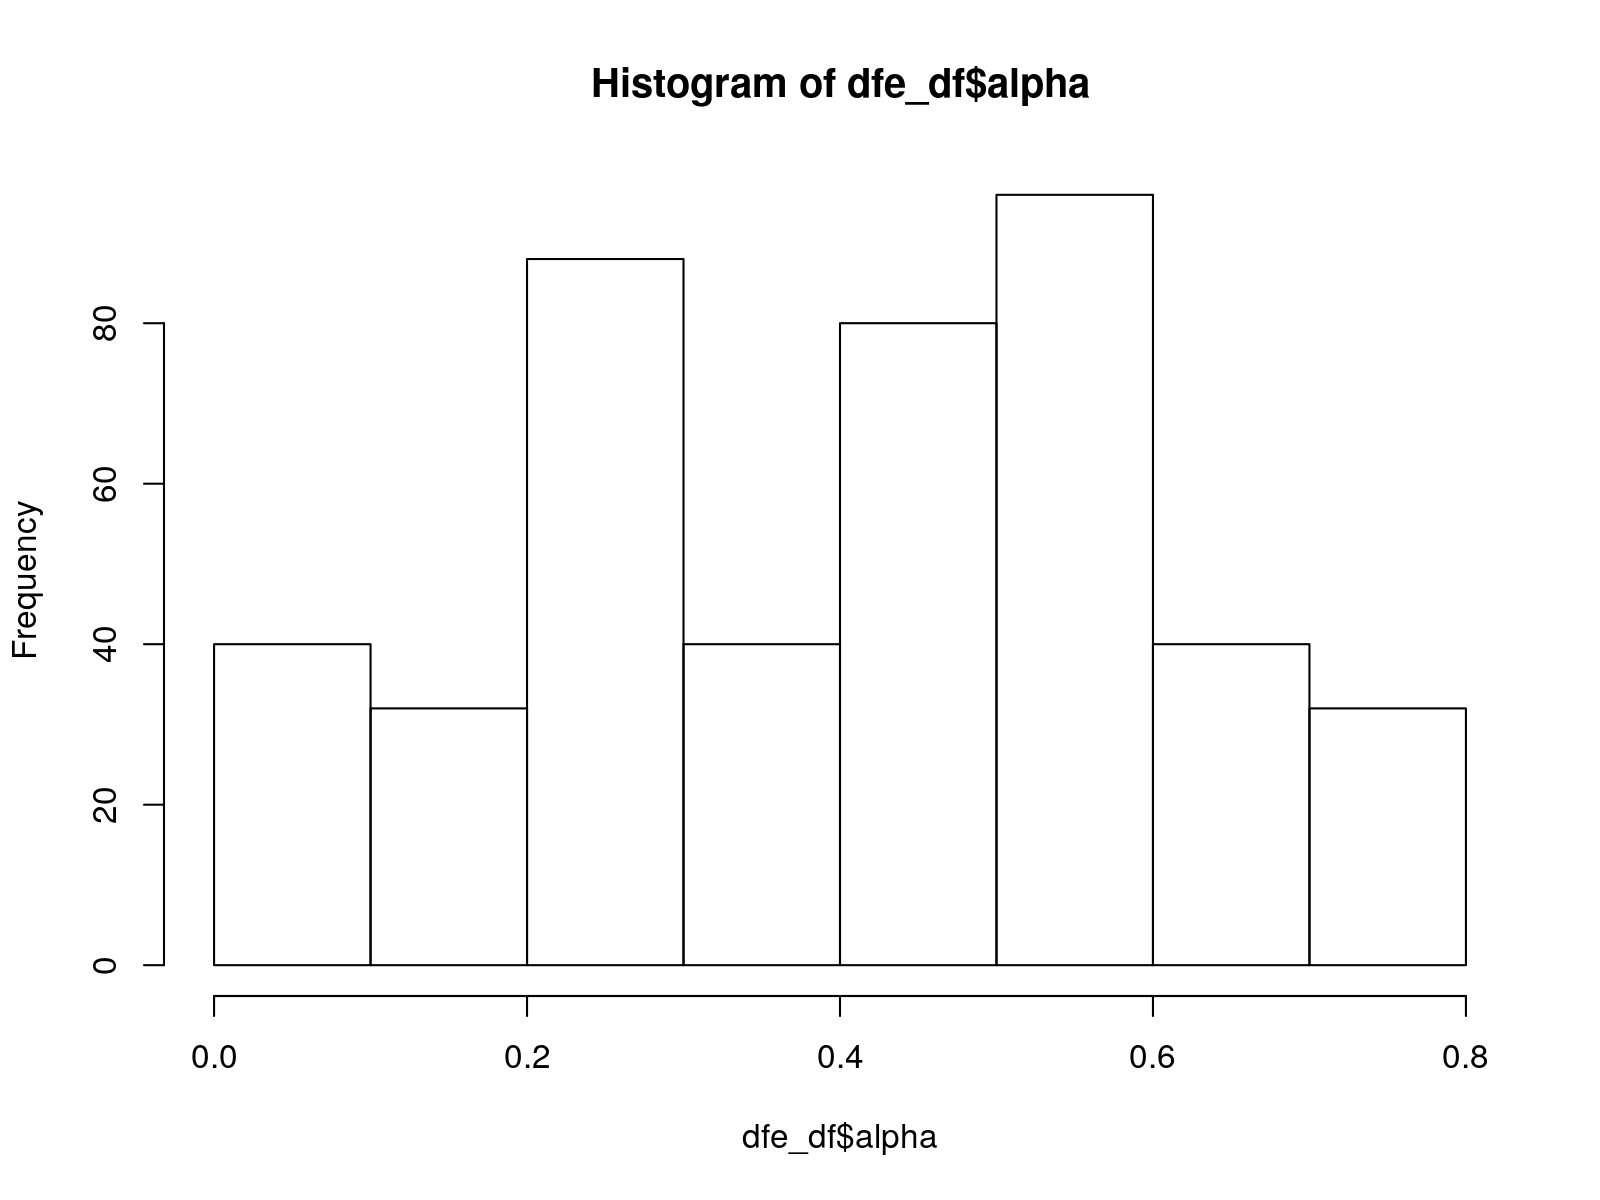


Call:
lm(formula = alpha ~ N_A + N_B + N_0 + T_B + T_0 + neg_prop + 
    pos_mean + pos_shape + neg_mean + neg_shape, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24604 -0.16694  0.00603  0.23163  0.73925 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.020508   0.039962   0.513   0.6089    
N_A          0.508602   0.071645   7.099 1.79e-10 ***
N_B          0.053203   0.042890   1.240   0.2177    
N_0          0.046655   0.039616   1.178   0.2417    
T_B          0.100848   0.051934   1.942   0.0549 .  
T_0          0.043914   0.059720   0.735   0.4638    
neg_prop    -0.767684   0.045573 -16.845  < 2e-16 ***
pos_mean     0.458162   0.042441  10.795  < 2e-16 ***
pos_shape    0.006251   0.039086   0.160   0.8733    
neg_mean    -0.313969   0.039681  -7.912 3.33e-12 ***
neg_shape    0.023707   0.042664   0.556   0.5797    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4067 on 1

Warning message:
“Removed 38 rows containing missing values (geom_point).”


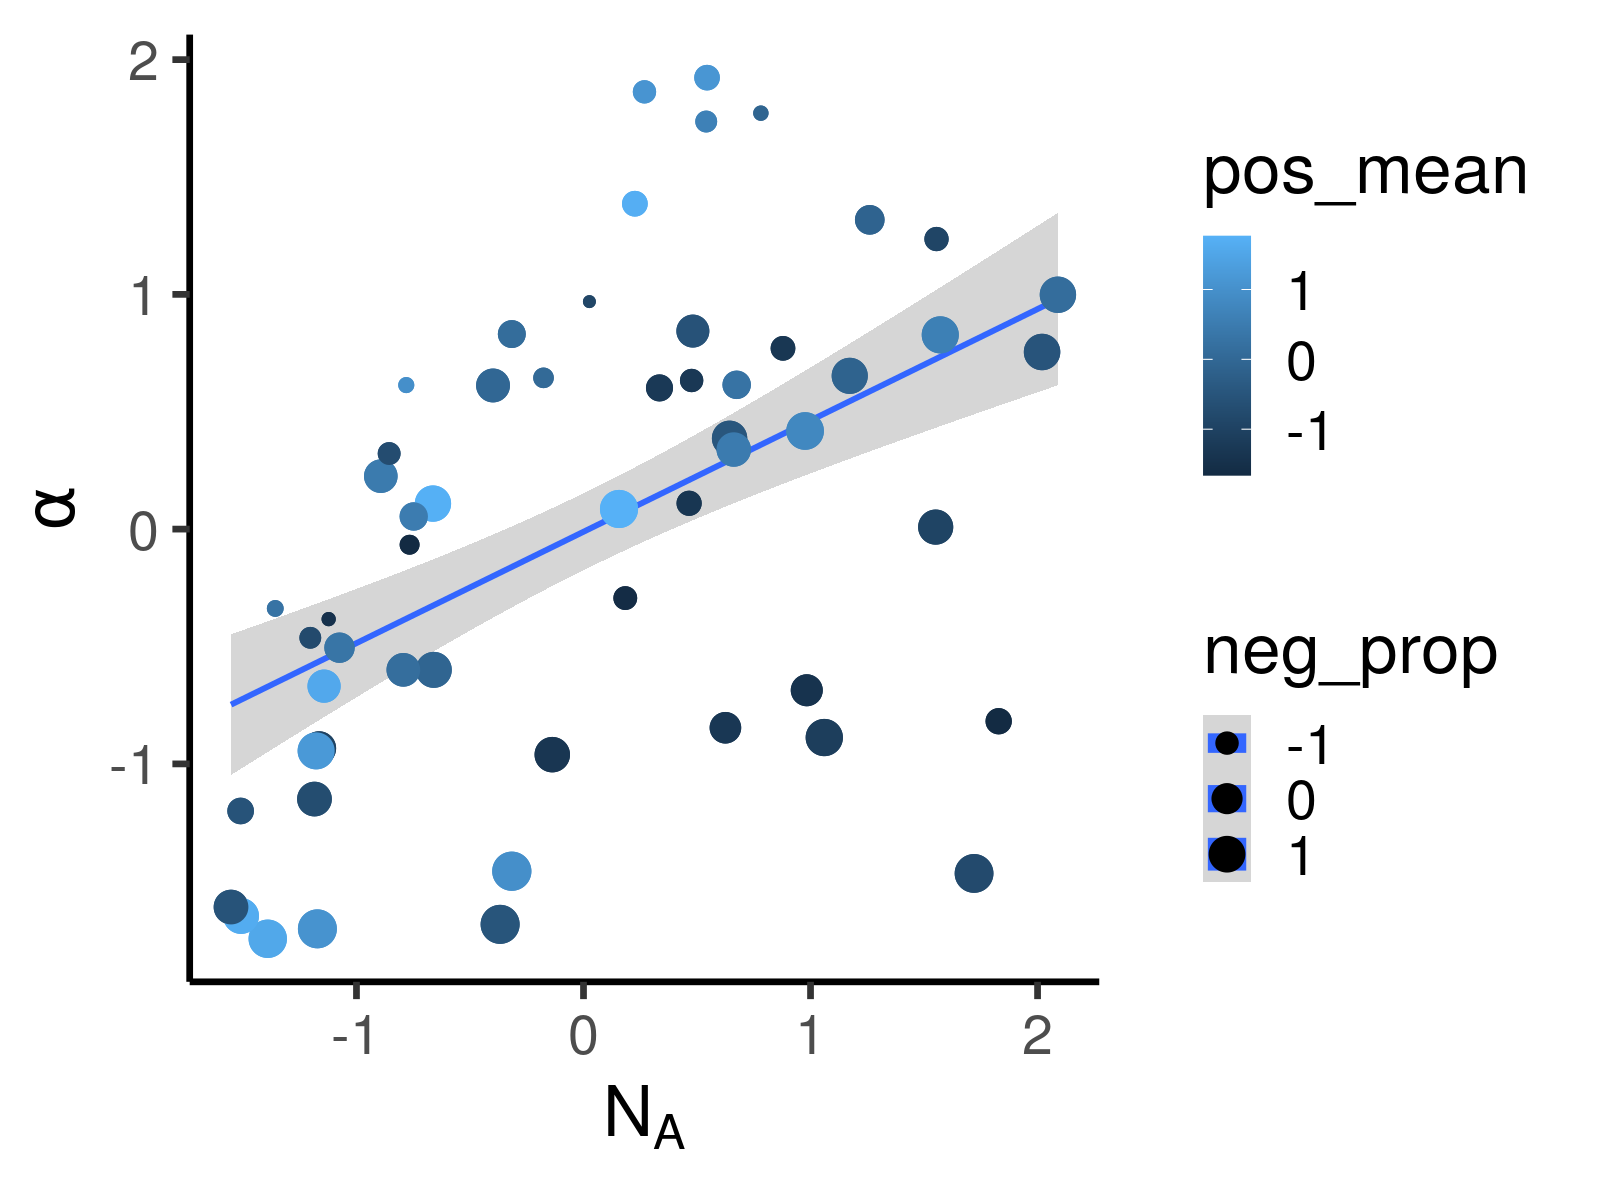


Call:
lm(formula = alpha ~ N_A_resid, data = .)

Coefficients:
(Intercept)    N_A_resid  
    0.03651      0.49331  



	Pearson's product-moment correlation

data:  N_A_resid and dfe_model_df$alpha
t = 2.9647, df = 110, p-value = 0.003716
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09105064 0.43558140
sample estimates:
      cor 
0.2720108 



	Pearson's product-moment correlation

data:  dfe_model_df$N_A and dfe_model_df$alpha
t = 5.9091, df = 110, p-value = 3.915e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3359059 0.6199547
sample estimates:
      cor 
0.4908663 


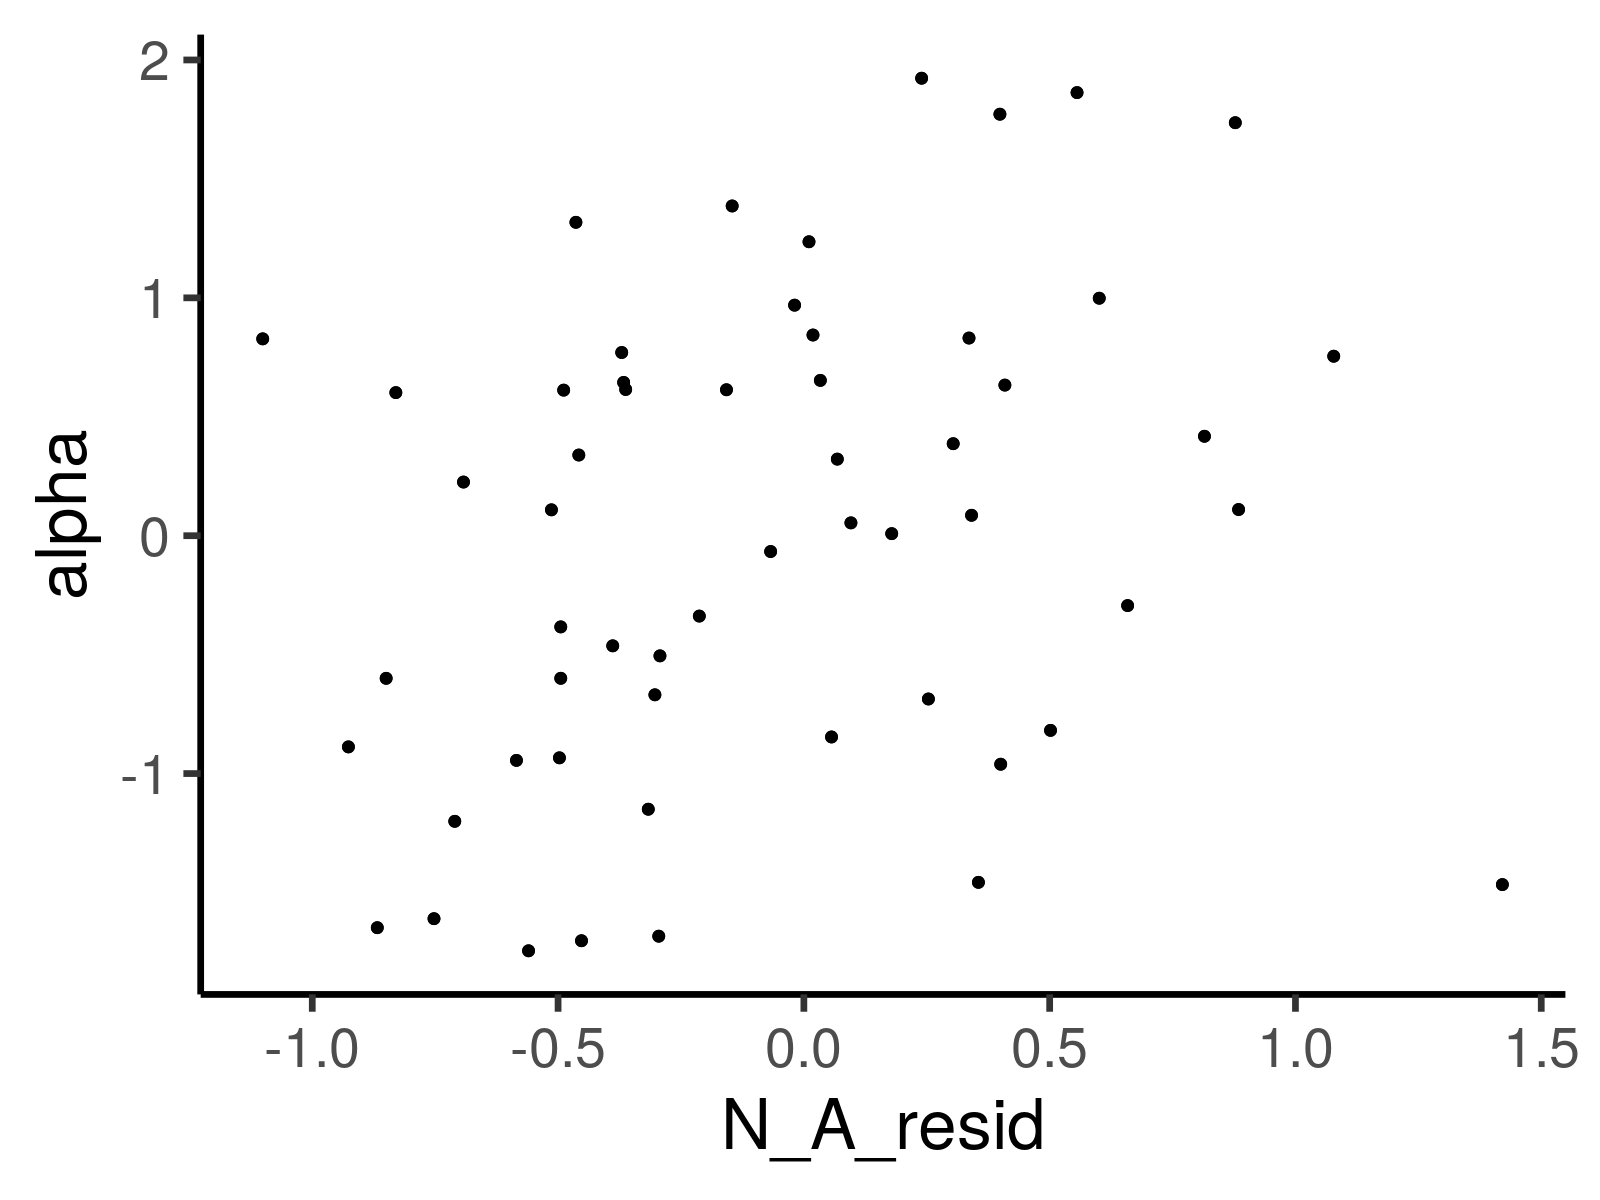

In [7]:
hist(dfe_df$alpha)

dfe_model_df <- 
    dfe_df %>%
    filter(n == 20) %>%    
    mutate_if(is.numeric, scale) 

dfe_model_df %>% 
    ggplot(aes(N_A, alpha, colour = pos_mean, size = neg_prop)) +
    geom_smooth(method = "lm") +
    geom_point() +
    xlab(expression(N[A])) +
    ylab(expression(alpha))


dfe_model_df %>% 
    lm(alpha ~ N_A + N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    summary()

N_A_resid <- 
    dfe_model_df %>% 
    lm(N_A ~ N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    residuals

dfe_model_df %>%
    ggplot(aes(N_A_resid, alpha)) +
    geom_point()

dfe_model_df %>% 
    lm(alpha ~ N_A_resid, data = .)

cor.test(N_A_resid ,dfe_model_df$alpha)
cor.test(dfe_model_df$N_A,dfe_model_df$alpha)